In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("Mall_Customers.csv")

In [60]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
x = data.iloc[:, 3:].values

# **Elbow Method**

In [78]:
from sklearn.cluster import KMeans
wssss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(x)
  wssss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

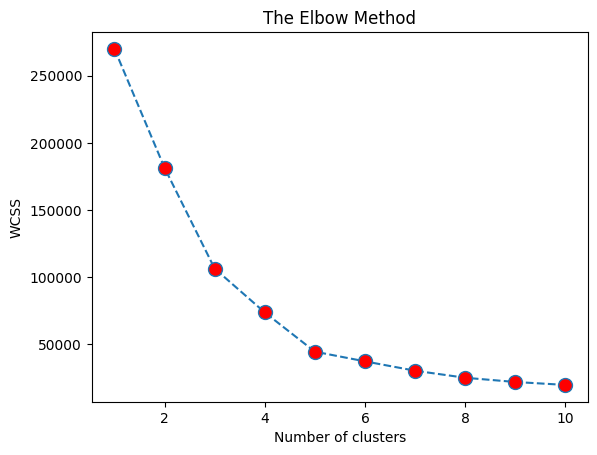

In [79]:
plt.plot(range(1, 11), wssss, ls = '--', marker = "o", markerfacecolor = "red", markersize = 10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

# **Building Final Model**

In [80]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(x)
y_pred = kmeans.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Visualization Without Using For Loops**

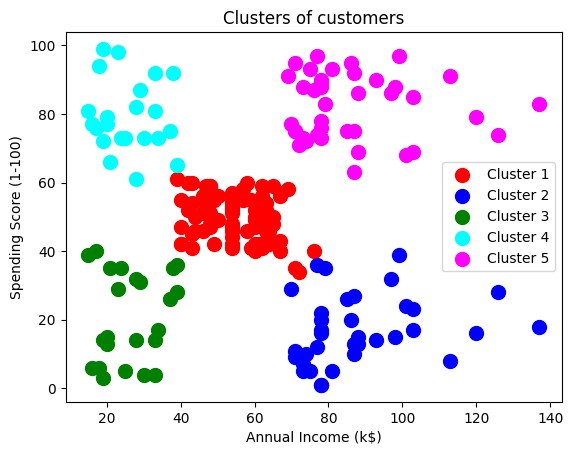

In [71]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'red', s=100, label = 'Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'blue', s=100, label = 'Cluster 2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], c = 'green', s=100, label = 'Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], c = 'cyan', s=100, label = 'Cluster 4')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], c = 'magenta', s=100, label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# **Visualization With For Loops**

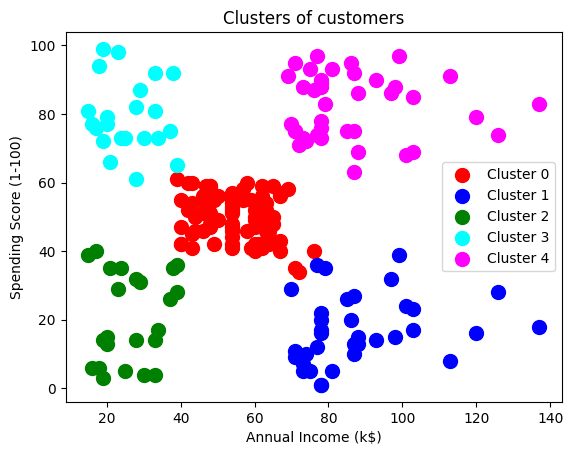

In [72]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(kmeans.n_clusters):
    plt.scatter(x[y_pred == i, 0], x[y_pred == i, 1], c = colors[i], s = 100, label = 'Cluster ' + str(i))

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()